# MASD: metrics.py Tutorial

Run the cells from top to bottom and replace the paths with your paths

## Imports

Make sure you have all libraries installed

In [11]:
import sys
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import cityblock
import matplotlib.pyplot as plt
#from matplotlib import rc

## Path

Replace Path with the one where you have the dataset in your computer.
It is recommended that you use Linux or Mac.
If you are using Windows, use a raw string for the path like: 
    <code> r"C:\Users\oriol\Downloads\dataset_fibrinogen\\" </code>

In [12]:
# Set the default font for the entire plot
plt.rcParams['font.family'] = 'Arial'  # Replace 'Arial' with the desired font
#plt.rcParams['font.size'] = 12  # Replace 12 with the desired font size

#path = os.path.abspath(r"/Users/gionni/Desktop/dataset_fibrinogen/" )

path = '/Users/gionni/Desktop/dataset_fibrinogen/'

# Check current working directory.
retval = os.getcwd()

print("Current working directory %s" % retval)

# Now change the directory
os.chdir( path + "..")

# Check current working directory.
retval = os.getcwd()
try:
    os.mkdir(os.path.join(retval, "figures"))
except:
    pass

os.chdir("figures")
figurepath = os.getcwd()

os.chdir( path )

retval = os.getcwd()
print("Directory changed successfully %s" % retval)


Current working directory /Users/gionni/Desktop/dataset_fibrinogen
Directory changed successfully /Users/gionni/Desktop/dataset_fibrinogen


## Now, run the rest of the code from top to bottom

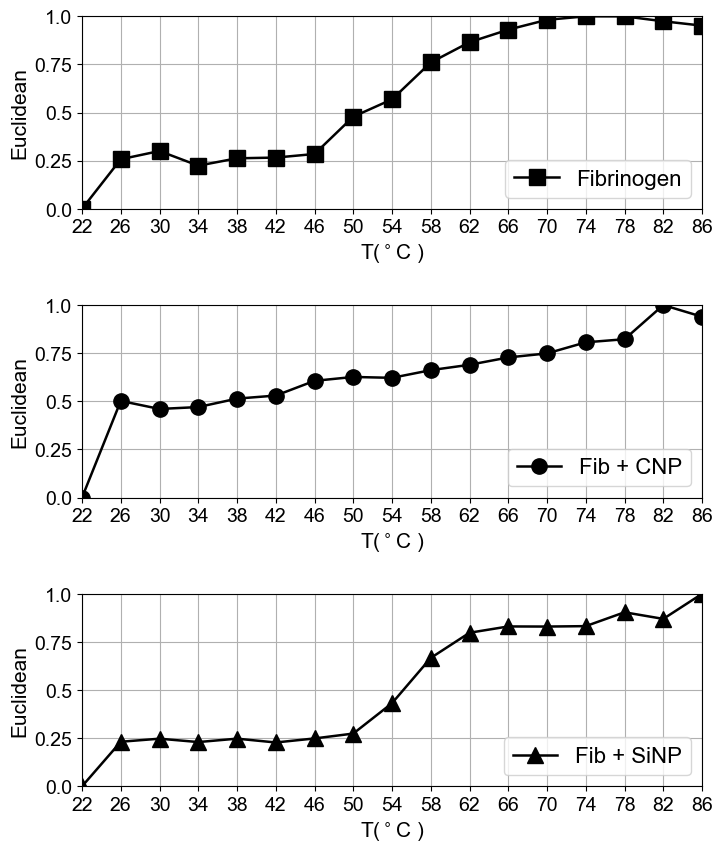

In [13]:
#inputs


# number of UVRR spectra Fib, Fib + CNP, Fib + SIO2NP

nos = 17  

# number of UV spectra  Fib + CNP

nou = 34

# number of CD spectra Fib + CNP

noc = 34


# number of UV spectra  Fib + SIO2NP

noua = 33

# number of CD spectra Fib + SIO2NP

noca = 33



# index for reference spectrum

irs = 0 


#interval limits for spectral truncations of UVRR (unit: cm^{-1})

l1 = 1310.
l2 = 1391.

# upper limit for Fib + nanoparticles
l2n = 1390.

l3 = 1530.
l4 = 1580.

l5 = 1660.
l6 = 1670.

l7 = 1730.
l8 = 1800.

l9 = 2800.
l10 = 3800.

#interval limits for spectral truncations of UV (unit: nm)


m1 = 210.
m2 = 260.


#interval limits for spectral truncations of CD (unit: nm)


n1 = 210.
n2 = 260.


# list of temperature in Celsius

tc =[22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86]

tc = np.array(tc)



#function

def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y


# Construction of composite spectra bulk Fibrinogen



intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l1 and itemX <= l2:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ina = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l3 and itemX <= l4:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

inb = [intensity[x:x+splitin] for x in range(0, length, splitin)]





intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l5 and itemX <= l6:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

inc = [intensity[x:x+splitin] for x in range(0, length, splitin)]




intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l7 and itemX <= l8:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ind = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l9 and itemX <= l10:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ine = [intensity[x:x+splitin] for x in range(0, length, splitin)]




intensity = []


for i in range(0,nou):
    strin =  str(i)
    string = 'inputUV' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= m1 and itemX <= m2:
            index = x0.index(itemX)
            intensity.append(y0[index])
           

length = len(intensity)
lenr = float(length)

split = lenr/float(nou)   
splitin = int(split)

inf = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,noc):
    strin =  str(i)
    string = 'inputCD' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= n1 and itemX <= n2:
            index = x0.index(itemX)
            intensity.append(y0[index])
            

length = len(intensity)
lenr = float(length)

split = lenr/float(noc)   
splitin = int(split)

ing = [intensity[x:x+splitin] for x in range(0, length, splitin)]




# Construction of data matrix whose rows are composite bulk spectra 

joinList = []

for i in range(0,nos):
    j = 2 * i
    intot = ina[i] + inb[i] + inc[i] + ind[i] + ine[i] + inf[j] + ing[j]
    joinList.append(intot)


X = np.array(joinList)





# Construction of composite spectra in presence of CNP


intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_CNP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l1 and itemX <= l2n:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ina = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_CNP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l3 and itemX <= l4:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

inb = [intensity[x:x+splitin] for x in range(0, length, splitin)]





intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_CNP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l5 and itemX <= l6:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

inc = [intensity[x:x+splitin] for x in range(0, length, splitin)]




intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_CNP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l7 and itemX <= l8:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ind = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_CNP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l9 and itemX <= l10:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ine = [intensity[x:x+splitin] for x in range(0, length, splitin)]




intensity = []


for i in range(0,nou):
    strin =  str(i)
    string = 'inputUV_CNP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= m1 and itemX <= m2:
            index = x0.index(itemX)
            intensity.append(y0[index])
           

length = len(intensity)
lenr = float(length)

split = lenr/float(nou)   
splitin = int(split)

inf = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,noc):
    strin =  str(i)
    string = 'inputCD_CNP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= n1 and itemX <= n2:
            index = x0.index(itemX)
            intensity.append(y0[index])
            #print(x0[index],y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(noc)   
splitin = int(split)

ing = [intensity[x:x+splitin] for x in range(0, length, splitin)]




# Construction of data matrix whose rows are multi-component spectra 
# in presence of CNP

joinList = []

for i in range(0,nos):
    j = 2 * i
    intot = ina[i] + inb[i] + inc[i] + ind[i] + ine[i] + inf[j] + ing[j]
    joinList.append(intot)


X_c = np.array(joinList)




# Construction of composite spectra in presence of SIO2NP


intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_SIO2NP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l1 and itemX <= l2n:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ina = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_SIO2NP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l3 and itemX <= l4:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

inb = [intensity[x:x+splitin] for x in range(0, length, splitin)]





intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_SIO2NP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l5 and itemX <= l6:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

inc = [intensity[x:x+splitin] for x in range(0, length, splitin)]




intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_SIO2NP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l7 and itemX <= l8:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ind = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,nos):
    strin =  str(i)
    string = 'inputUVRR_SIO2NP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= l9 and itemX <= l10:
            index = x0.index(itemX)
            intensity.append(y0[index])


length = len(intensity)
lenr = float(length)

split = lenr/float(nos)   
splitin = int(split)

ine = [intensity[x:x+splitin] for x in range(0, length, splitin)]




intensity = []


for i in range(0,noua):
    strin =  str(i)
    string = 'inputUV_SIO2NP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= m1 and itemX <= m2:
            index = x0.index(itemX)
            intensity.append(y0[index])
           

length = len(intensity)
lenr = float(length)

split = lenr/float(noua)   
splitin = int(split)

inf = [intensity[x:x+splitin] for x in range(0, length, splitin)]


intensity = []


for i in range(0,noca):
    strin =  str(i)
    string = 'inputCD_SIO2NP' + '_' + strin + '.txt'
    x0, y0 = Read_Two_Column_File(string)
    for itemX in x0:
        if itemX >= n1 and itemX <= n2:
            index = x0.index(itemX)
            intensity.append(y0[index])
           

length = len(intensity)
lenr = float(length)

split = lenr/float(noca)   
splitin = int(split)

ing = [intensity[x:x+splitin] for x in range(0, length, splitin)]




# Construction of data matrix whose rows are multi-component spectra 
# in presence of SIO2NP

joinList = []

for i in range(0,nos):
    j = 2 * i
    intot = ina[i] + inb[i] + inc[i] + ind[i] + ine[i] + inf[j] + ing[j]
    joinList.append(intot)


X_s = np.array(joinList)


# Standardise the data


scaler = StandardScaler()

X_st = scaler.fit_transform(X)
X_c_st = scaler.fit_transform(X_c)
X_s_st = scaler.fit_transform(X_s)





euclidean = []
wasserstein = []
manhattan = []




ref = X_st[irs]

for j in range(0, nos):  
    test = X_st[j]
    det =  distance.euclidean(test, ref)
    dwt = wasserstein_distance(test, ref)
    dmt = cityblock(test, ref)
    euclidean.append(det)
    wasserstein.append(dwt)
    manhattan.append(dmt)
    
   
de = np.array(euclidean)
dw = np.array(wasserstein)
dm = np.array(manhattan)

max_de = np.amax(de)
max_dw = np.amax(dw)
max_dm = np.amax(dm)


# normalisation of metrics

den = de/max_de
dwn = dw/max_dw
dmn = dm/max_dm



euclidean = []
wasserstein = []
manhattan = []

ref = X_c_st[irs]

for j in range(0, nos):
    test = X_c_st[j]
    det =  distance.euclidean(test, ref)
    dwt = wasserstein_distance(test, ref)
    dmt = cityblock(test, ref)
    euclidean.append(det)
    wasserstein.append(dwt)
    manhattan.append(dmt)

   
de = np.array(euclidean)
dw = np.array(wasserstein)
dm = np.array(manhattan)

max_de = np.amax(de)
max_dw = np.amax(dw)
max_dm = np.amax(dm)


# normalisation of metrics

dem = de/max_de
dwm = dw/max_dw
dmm = dm/max_dm





euclidean = []
wasserstein = []
manhattan = []

ref = X_s_st[irs]

for j in range(0, nos):  
    test = X_s_st[j]
    det =  distance.euclidean(test, ref)
    dwt = wasserstein_distance(test, ref)
    dmt = cityblock(test, ref)
    euclidean.append(det)
    wasserstein.append(dwt)
    manhattan.append(dmt)
    
   
de = np.array(euclidean)
dw = np.array(wasserstein)
dm = np.array(manhattan)

max_de = np.amax(de)
max_dw = np.amax(dw)
max_dm = np.amax(dm)


# normalisation of metrics

deq = de/max_de
dwq = dw/max_dw
dmq = dm/max_dm



# Create a figure with subplots
fig, axs = plt.subplots(3, 1, sharex=False, figsize=(8, 10))

y_ticks = [0.0, 0.25, 0.50, 0.75, 1.0]

# Plot each curve in a different subplot
axs[0].plot(tc, den, '-k',  marker ='s', markersize=11, linewidth=1.8)
axs[1].plot(tc, dem, '-k',  marker ='o', markersize=11, linewidth=1.8)
axs[2].plot(tc, deq, '-k',  marker ='^', markersize=11, linewidth=1.8)


# Customize the plot
for i, ax in enumerate(axs):
    ax.grid(True)
    ax.set_ylim(0, 1)  # Set y-axis limit to [0, 1]
    ax.set_xlim(22, 86)  # Set x-axis limit to [22, 86]
    ax.set_ylabel(f'Euclidean', fontsize=15) #{i+1}
    ax.set_xlabel(r'T($ ^\circ$C )',fontsize=15)
    # Set x-axis ticks and labels for each subplot
    x_ticks = np.arange(22, 87, 4)  # Ticks from 22 to 86, each at distance 4
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_xticklabels(x_ticks, fontsize=14)
    ax.set_yticklabels(y_ticks, fontsize=14)





# Manually set legends for each panel
axs[0].legend(['Fibrinogen'],  loc='lower right', fontsize=16)
axs[1].legend(['Fib + CNP'], loc='lower right',  fontsize=16)
axs[2].legend(['Fib + SiNP'], loc='lower right', fontsize=16)


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the value as needed for your desired spacing


## Plots
Replace the paths with the one where you want your figures to be saved.

<Figure size 640x480 with 0 Axes>

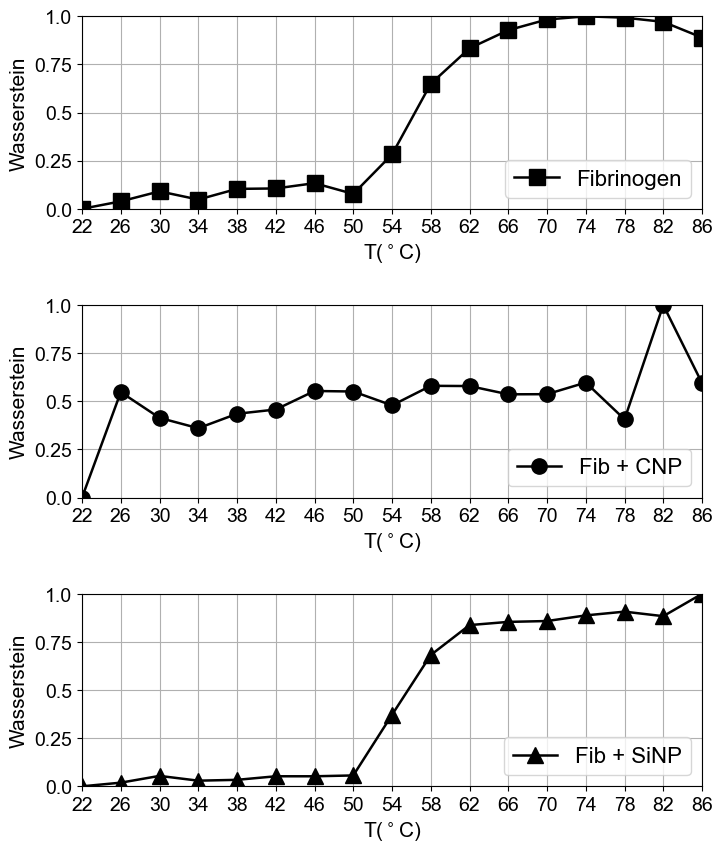

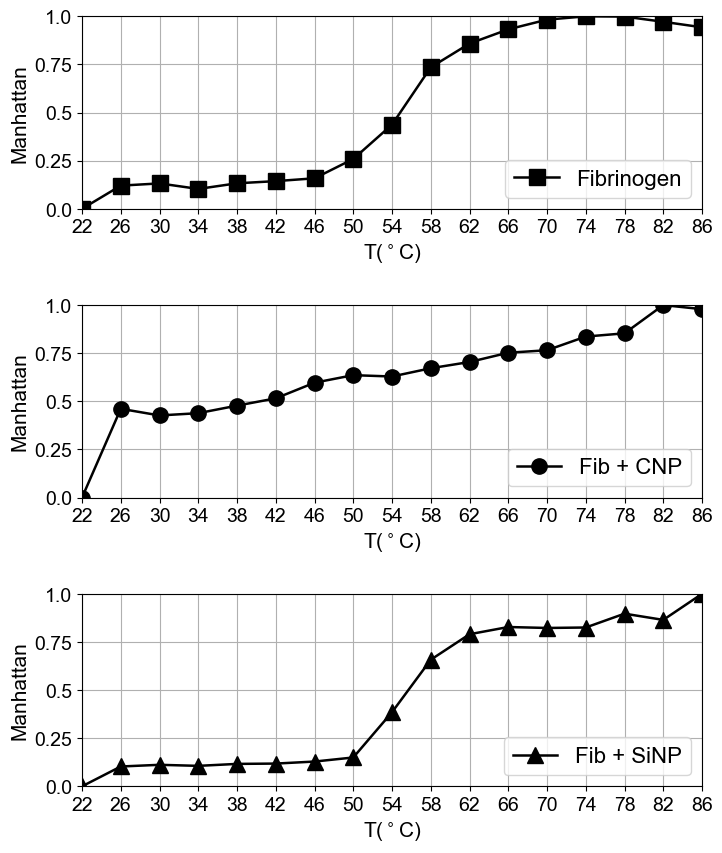

In [14]:

plt.savefig(figurepath + '/euclidean.pdf', bbox_inches='tight')

# Show the plot
plt.show()



# Create a figure with subplots
fig, axs = plt.subplots(3, 1, sharex=False, figsize=(8, 10))

# Plot each curve in a different subplot
axs[0].plot(tc, dwn, '-k',  marker ='s', markersize=11, linewidth=1.8)
axs[1].plot(tc, dwm, '-k',  marker ='o', markersize=11, linewidth=1.8)
axs[2].plot(tc, dwq, '-k',  marker ='^', markersize=11, linewidth=1.8)


# Customize the plot
for i, ax in enumerate(axs):
    #ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 1)  # Set y-axis limit to [0, 1]
    ax.set_xlim(22, 86)  # Set x-axis limit to [22, 86]
    ax.set_ylabel(f'Wasserstein', fontsize=15) #{i+1}
    ax.set_xlabel(r'T($ ^\circ$C)',fontsize=15)
    # Set x-axis ticks and labels for each subplot
    x_ticks = np.arange(22, 87, 4)  # Ticks from 22 to 86, each at distance 4
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_xticklabels(x_ticks, fontsize=14)
    ax.set_yticklabels(y_ticks, fontsize=14)


   





# Manually set legends for each panel
axs[0].legend(['Fibrinogen'],  loc='lower right',  fontsize=16)
axs[1].legend(['Fib + CNP'], loc='lower right',  fontsize=16)
axs[2].legend(['Fib + SiNP'], loc='lower right',  fontsize=16)


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the value as needed for your desired spacing


plt.savefig(figurepath + '/wasserstein.pdf', bbox_inches='tight')


# Show the plot
plt.show()




# Create a figure with subplots
fig, axs = plt.subplots(3, 1, sharex=False, figsize=(8, 10))

# Plot each curve in a different subplot
axs[0].plot(tc, dmn, '-k',  marker ='s', markersize=11, linewidth=1.8)
axs[1].plot(tc, dmm, '-k',  marker ='o', markersize=11, linewidth=1.8)
axs[2].plot(tc, dmq, '-k',  marker ='^', markersize=11, linewidth=1.8)


# Customize the plot
for i, ax in enumerate(axs):
    ax.grid(True)
    ax.set_ylim(0, 1)  # Set y-axis limit to [0, 1]
    ax.set_xlim(22, 86)  # Set x-axis limit to [22, 86]
    ax.set_ylabel(f'Manhattan', fontsize=15) #{i+1}
    ax.set_xlabel(r'T($ ^\circ$C)', fontsize=15)
    # Set x-axis ticks and labels for each subplot
    x_ticks = np.arange(22, 87, 4)  # Ticks from 22 to 86, each at distance 4
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_xticklabels(x_ticks, fontsize=14)
    ax.set_yticklabels(y_ticks, fontsize=14)




# Manually set legends for each panel
axs[0].legend(['Fibrinogen'],  loc='lower right',  fontsize=16)
axs[1].legend(['Fib + CNP'], loc='lower right',  fontsize=16)
axs[2].legend(['Fib + SiNP'], loc='lower right',  fontsize=16)


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the value as needed for your desired spacing


plt.savefig(figurepath + '/manhattan.pdf', bbox_inches='tight')

# Show the plot
plt.show()